# Implementing Image Enhancements in Python

## Table of Contents
* [Image Enhancement](#Enhancement)
    * [Histogram Equalization](#8_1_Histogram_Equalization)
    * [Increasing Dynamic Range](## 8_2_Increasing_Dynamic_Range)
* [Python Implementation](#Implementation)
* [Applying the Enhancement](#Applying)

<a id="Enhancement"></a>
## Image Enhancement

The quality of images can be enhanced in different ways. Here, we work on two ways of enhancing images:
* Histogram Equalization
* Increasing the Dynamic Range of the image's intentsities.

<a id="Histogram"></a>
## Histogram Equalization

Histogram equalization of an image is calculated as follows:

First, the histogram of an image is a probability density function of its gray levels.

$Pr(r_k) = \frac{n_k}{n}$       $0 \leq r_k \leq 1$ and $k=0, 1, 2, 3, ...,L-1 $ 

$L$ = image's intensity levels. $Pr(r_k)$ is the probability of the $k$th gray level. $n_k$ is the number of times the $k_th$ level occurs in the image. $n$ is the total number of pixels.

The transformation function is defined as:

$ s_k = T(r_k) = \sum_{j=0}^{k}\frac{n_j}{n} = \sum_{j=0}^{k}Pr(r_j) $

After applying the transformation function to an original image, its histogram is equalized and its quality is usually improved.

<a id="Range"></a>
## Increasing Dynamic Range

Another way of enhancing an image is by increasing the dynamic range of the pixels' intensities.

Assuming that the minimum and maximum intensities of the original image are $a$ and $b$ respectively. The new interval will be $[r_1, r_k]$ where $r_1 \leq a$  and $r_k \geq b$.

So, the new intensity value of a pixel will be:

$$
r' = 
\begin{cases}
\frac{r_k - r_1}{b-a}(r-a) + r_1 \hspace{1cm} if  \; a \leq r \leq b\\
r_1 \hspace{4cm} if \; r < a\\
r_k \hspace{4cm} if \; r > b
\end{cases}
$$

 

In the next session, we are going to implement the above mentioned image enhancing methods.

<a id="Implementation"></a>
## Python Implementation

Let's first import the common classes.

In [1]:
from CommonClasses.fft import *
from CommonClasses.dct import *
from CommonClasses.walsh import *
from CommonClasses.haar import *

import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

#import matplotlib.image as img
#import PIL.Image as Image 
from PIL import Image
import math
import cmath

import time

import csv

from numpy import binary_repr

from fractions import gcd

In [2]:
def computeImageDistribution(imge, intensity):
    """Computes the original intensity distribution of a given image. The image's 
    intensity is an 8-bit gray scale by default (0 - 255). Otherwise you can change it."""
    
    N = imge.shape[0]
    
    #Flatten the image into 1-D.
    imge = imge.reshape(N*N)
    
    #All the possible intensities divided by the maximum intensity.
    r_k = np.arange(intensity)/(intensity-1.0)
    
    #Count the number of pixels for each intensity
    n_k = np.bincount(imge, minlength=intensity)
    
    #Calculate the probability of each intensity.
    pr_r_k = n_k/(1.0*N*N)
    
    return r_k, n_k, pr_r_k


In [3]:
def computeTranformFunction(pr_r_k, intensity=256):
    """Computes the transformation function from the prob. distribution of the given image.""" 
    
    #Compute the cummulative sum of the given probabilities
    s_k = np.round((intensity-1)*np.cumsum(pr_r_k)).astype(int)
    
    return s_k

In [4]:
def computeHistogramEqualization(imge, intensity=256):
    """Computes the histogram equalization of an image by finding the probabilities of s_k."""

    #Compute the image pixels' distribution
    r_k, n_k, pr_r_k = computeImageDistribution(imge, intensity)
    
    #Compute the Transformation function
    s_k = computeTranformFunction(pr_r_k, intensity)
    
    imgeEq = np.copy(imge)
    #Create a new array to store the final results of the equalization
    pr_s_k = np.zeros(len(r_k), dtype=int)
    
    for i in xrange(s_k.shape[0]):
        
        #Change the pixel value according to values in s_k
        imgeEq[imge==i] = s_k[i]
        
    return imgeEq

In [5]:
def increaseDynamicRange(imge, r1, rk):
    """Increases the dynamic range of a given image's intensities from [a, b] to 
    bigger interval [r1, rk]"""
    
    #Compute minimum and maximum intensities
    a = np.min(imge)
    b = np.max(imge)
    
    imgeModified = ((float(rk - r1)/(b-a))*(imge - a)) + r1
    
    return imgeModified

<a id="Applying"></a>
## Applying The Code

in this section, we will apply the histogram equalization and increasing dynamic range to some real world images.

In [6]:
#Read image from file
imge = Image.open("Images/To_be_equalized2.tif")

#Convert the image file to a matrix
imge = np.array(imge)

We will now calculate the equalized image based on the given one and it's intensity value

In [7]:
#Histogram Equalization
intensity = 256
r_k, n_k, pr_r_k = computeImageDistribution(imge, intensity)
imgeEqualized = computeHistogramEqualization(imge, intensity)
r_k2, n_k2, pr_r_k2 = computeImageDistribution(imgeEqualized, intensity)

#Increase Dynamic Range
imgeMod = increaseDynamicRange(imge, 0, 255)
r_k3, n_k3, pr_r_k3 = computeImageDistribution(imgeMod.astype(int), intensity)

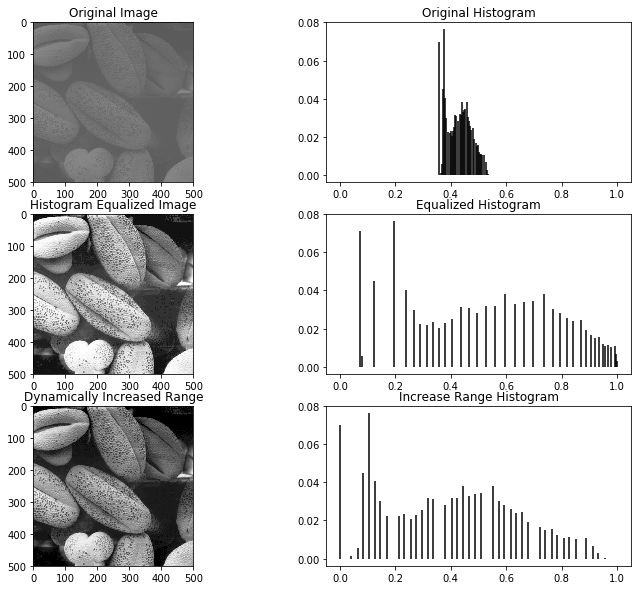

In [8]:
fig, axarr = plt.subplots(3, 2, figsize=[12,10])
axarr[0][0].imshow(imge, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
axarr[0][0].set_title('Original Image')

#axarr[0][0].plot(r_k, pr_r_k, 'k.')
axarr[0][1].vlines(r_k, [0], pr_r_k, linestyles='-')
axarr[0][1].set_title('Original Histogram')

axarr[1][0].imshow(imgeEqualized, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
axarr[1][0].set_title('Histogram Equalized Image')

axarr[1][1].vlines(r_k2, [0], pr_r_k2, linestyles='-')
axarr[1][1].set_title('Equalized Histogram')

axarr[2][0].imshow(imgeMod, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
axarr[2][0].set_title('Dynamically Increased Range')

axarr[2][1].vlines(r_k3, [0], pr_r_k3, linestyles='-')
axarr[2][1].set_title('Increase Range Histogram')

plt.show()

As can be seen in the above figures, the picture is enhanced by using the different enhancement features